Objective of this notebook: let me figure out what went wrong with the energy percentage calculating code that ended up putting nearly all the energy in the delta band and no energy anywhere else.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
tau = 2 * np.pi
SAMPLE_RATE = 256

In [8]:
# Create some synthetic signals to start the debug process
def make_signal(freq):
    return np.sin(np.linspace(0, 5 * tau * freq, 1280))
signal_delta_only = make_signal(2)
signal_theta_only = make_signal(5)
signal_alpha_only = make_signal(10)
signal_beta_only = make_signal(20)
signal_logamma_only = make_signal(50)
signal_higamma_only = make_signal(100)

In [22]:
def energy_percentages(signal):
    """
    Calculate the percent of energy in various frequency bands. Those bands are:

    * Delta (<= 3 Hz)
    * Theta (4-7 Hz)
    * Alpha (8-13 Hz)
    * Beta (14-30 Hz)
    * Lower Gamma (30-55 Hz)
    * Higher Gamma (65-110 Hz)
    """
    padded = np.array([0] * 100 + list(signal) + [0] * 100)
    freqs = np.fft.rfftfreq(len(padded)) * SAMPLE_RATE
    fft = np.abs(np.fft.rfft(padded))
    overall = np.trapz(fft, freqs)
    delta = band_energy(fft, freqs, 0, 3)
    theta = band_energy(fft, freqs, 4, 7)
    alpha = band_energy(fft, freqs, 8, 13)
    beta = band_energy(fft, freqs, 14, 30)
    gamma1 = band_energy(fft, freqs, 30, 55)
    gamma2 = band_energy(fft, freqs, 65, 110)
    return np.array([delta, theta, alpha, beta, gamma1, gamma2]) / overall

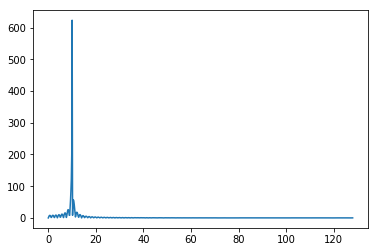

In [21]:
padded = np.array([0] * 100 + list(signal_alpha_only) + [0] * 100)
freqs = np.fft.rfftfreq(len(padded)) * SAMPLE_RATE
fft = np.abs(np.fft.rfft(padded))
plt.plot(freqs, fft)

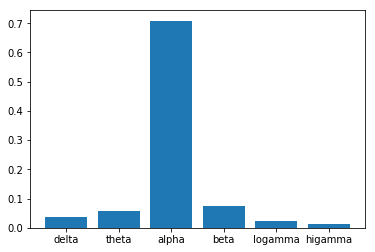

In [40]:
plt.bar(range(6), energy_percentages(signal_alpha_only),
        tick_label=['delta', 'theta', 'alpha', 'beta', 'logamma', 'higamma'])
plt.show()